<a href="https://colab.research.google.com/github/bushranajeeb/AI_ML_assignment/blob/main/AI%26ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the train.csv file from "**Titanic - Machine Learning from Disaster**" dataset for this task. It contains passengers' information like name, age, gender, socio-economic class, etc.

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/bushranajeeb/AI_ML_assignment/main/train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are missing values in Age and Cabin column

In [ ]:
df.isnull().sum()

#we have 177 missing values in age column, 687 missing values in Cabin and 2 in Embarked column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

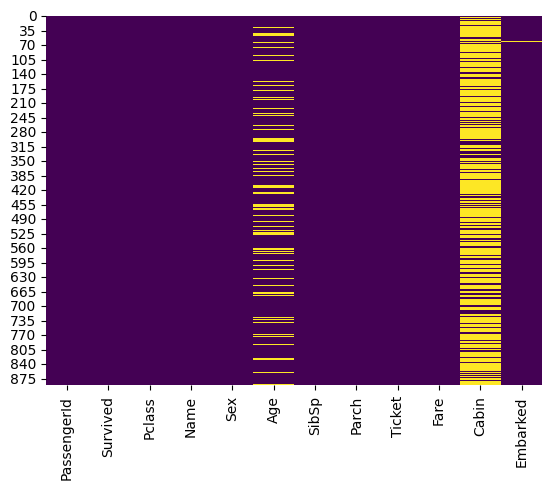

In [ ]:
#Heatmap of the null values

sns.heatmap(df.isnull(), cmap = 'viridis', cbar=False)

## **Data** **Cleaning**

In [ ]:
#Creating a new column "contains_cabin" and filling it with "1" if there is a Cabin and "0" for null values

def create_contains_cabin(df, name):
    # Using the `notna()` function to create a boolean mask where Cabin is not null
    df['contains_cabin'] = df[name].notna().astype(int)
    return df

# Call the function
df = create_contains_cabin(df, 'Cabin')


Similarly, the Age column has a lot of missing values. Hence we fill the missing values with random values centered around mean and (spread out) distributed with standard deviation, sd. Let's get the mean and standard deviation first.

In [ ]:
mean = df['Age'].mean()
sd = df['Age'].std()
print(mean,sd)

29.69911764705882 14.526497332334042


The mean of the dataset is 29.48 and the standard deviation of the dataset is 14.53. Hence we fill the missing values by choosing a random number between 16 and 43.

In [ ]:
def fill_na_age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()

    # Creating a mask to identify missing values in the 'Age' column
    missing_mask = df[colname].isnull()

    # Generating random integers within the mean +/- standard deviation range
    random_ages = np.random.randint(mean - sd, mean + sd, size=df[colname].isnull().sum())

    # Filling the missing values with the generated random ages
    df.loc[missing_mask, colname] = random_ages

    # Converting the column to integer data type
    df[colname] = df[colname].astype(int)

    return df

# Call the function
df = fill_na_age(df, 'Age')


## Feature Engineering

In [ ]:
def create_categoricalFare(df, colname):
    # Define custom bin edges for fare
    fare_bins = [-float('inf'), 7.91, 14.454, 31.0, float('inf')]
    labels = [0, 1, 2, 3]

    # Using `cut` to categorize the fare values into bins and assign labels
    df['CategoricalFare'] = pd.cut(df[colname], bins=fare_bins, labels=labels, include_lowest=True)
    df['CategoricalFare'] = df['CategoricalFare'].astype(int)

    return df

# Call the function
df = create_categoricalFare(df, 'Fare')


In [ ]:
import pandas as pd

def create_categoricalAge(df, colname):
    # Define custom bin edges for age
    age_bins = [-float('inf'), 16, 32, 48, 64, float('inf')]
    labels = [0, 1, 2, 3, 4]

    # Using `cut` to categorize the age values into bins and assign labels
    df['CategoricalAge'] = pd.cut(df[colname], bins=age_bins, labels=labels, include_lowest=True)
    df['CategoricalAge'] = df['CategoricalAge'].astype(int)

    return df

# Call the function
df = create_categoricalAge(df, 'Age')


In [ ]:
import re

def create_categorical_title(df):
    title_mapping = {
        "Mlle": "Miss",
        "Ms": "Miss",
        "Mme": "Mrs",
    }

    def find_title(name: str) -> str:
        search = re.search(" ([A-Za-z]+)\.", name)
        if search:
            title = search.group(1)
            return title_mapping.get(title, "Rare")
        return "Rare"

    df["Title"] = df["Name"].apply(find_title).map({"Miss": 1, "Mrs": 2, "Mr": 3, "Rare": 4})
    return df

# Call the function
df = create_categorical_title(df)


In [ ]:
def create_sex(df, colname):
    # Using a lambda function to map 'male' to 1 and others to 0
    df['SexNumerical'] = df[colname].map(lambda x: 1 if x == 'male' else 0)
    return df

# Call the function
df = create_sex(df, 'Sex')

# Replace 'Embarked' values with numerical counterparts
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
# def create_feat_categoricalFare(df, colname):
#     return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)
# df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

In [ ]:
# def create_feat_categoricalAge(df, colname):
#     return pd.qcut(df[colname], 5, labels = [0, 1, 2, 3, 4]).astype(int)
# df['CategoricalAge'] = create_feat_categoricalAge(df, 'Age')

In [ ]:
# import re
# def create_categorical_title(df):
#     def find_title(name: str) -> str:
#         search = re.search(
#             " ([A-Za-z]+)\.", name
#         )  # Search for a word with a point at the end
#         if search:
#             title = search.group(1)
#             if title in ["Mlle", "Ms"]:
#                 return "Miss"
#             elif title in ["Mme", "Mrs"]:
#                 return "Mrs"
#             elif title == "Mr":
#                 return "Mr"
#             else:
#                 return "Rare"
#         return ""

#     return_title = df["Name"].apply(find_title)
#     dict_title = {"Miss": 1, "Mrs": 2, "Mr": 3, "Rare": 4}
#     return return_title.replace(dict_title)


# df["Title"] = create_categorical_title(df)


In [ ]:
# def create_feat_sex(df, colname):
#     def sex(x):
#         if x=='male':
#             return 1
#         return 0

#     return df[colname].apply(sex)

# df['SexNumerical'] = create_feat_sex(df, 'Sex')
# df['Embarked'] = df.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})

In [ ]:
df.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
contains_cabin       0
CategoricalFare      0
CategoricalAge       0
Title                0
SexNumerical         0
dtype: int64

In [ ]:
#Dropping irrelevant features
def remove_features(df):
    drop_list = ["PassengerId", "Cabin", "Ticket", "SibSp", "Name"]
    return df.drop(drop_list, axis=1)


df = remove_features(df)
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,contains_cabin,CategoricalFare,CategoricalAge,Title,SexNumerical
0,0,3,male,22,0,7.2500,0.0,0,0,1,4,1
1,1,1,female,38,0,71.2833,1.0,1,3,2,4,0
2,1,3,female,26,0,7.9250,0.0,0,1,1,4,0
3,1,1,female,35,0,53.1000,0.0,1,3,2,4,0
4,0,3,male,35,0,8.0500,0.0,0,1,2,4,1


In [ ]:
corrmat = df.corr()
corrmat

<ipython-input-43-6f7dac871a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


,Survived,Pclass,Age,Parch,Fare,Embarked,contains_cabin,CategoricalFare,CategoricalAge,Title,SexNumerical
Survived,1.000000,-0.338481,-0.061346,0.081629,0.257307,0.108669,0.316912,0.295875,-0.057991,-0.084043,-0.543351
Pclass,-0.338481,1.000000,-0.323169,0.018443,-0.549500,0.043835,-0.725541,-0.628459,-0.316578,0.082234,0.131900
Age,-0.061346,-0.323169,1.000000,-0.157507,0.098311,-0.013255,0.230720,0.092478,0.938283,0.021712,0.066916
Parch,0.081629,0.018443,-0.157507,1.000000,0.216225,-0.079320,0.036987,0.393048,-0.132841,0.031420,-0.245489
Fare,0.257307,-0.549500,0.098311,0.216225,1.000000,0.063462,0.482075,0.576836,0.115071,-0.021827,-0.182333
Embarked,0.108669,0.043835,-0.013255,-0.079320,0.063462,1.000000,0.016190,-0.089597,-0.026164,-0.038130,-0.118593
contains_cabin,0.316912,-0.725541,0.230720,0.036987,0.482075,0.016190,1.000000,0.497108,0.229247,-0.078671,-0.140391
CategoricalFare,0.295875,-0.628459,0.092478,0.393048,0.576836,-0.089597,0.497108,1.000000,0.088526,-0.056359,-0.248940
CategoricalAge,-0.057991,-0.316578,0.938283,-0.132841,0.115071,-0.026164,0.229247,0.088526,1.000000,0.027150,0.062710
Title,-0.084043,0.082234,0.021712,0.031420,-0.021827,-0.038130,-0.078671,-0.056359,0.027150,1.000000,0.089919


'SexNumerical' has a strong negative correlation (-0.543351) with survival, suggesting that females (SexNumerical = 0) were more likely to survive.

'Pclass' (Passenger Class) has a negative correlation (-0.338481) with survival, indicating that passengers in higher classes (lower Pclass values) were more likely to survive.

'Fare' has a positive correlation (0.257307) with survival, suggesting that passengers who paid higher fares were more likely to survive. 'CategoricalFare' has a positive correlation (0.295875) with survival, similar to the 'Fare' feature. This confirms that the fare category is a relevant factor for survival prediction.

<ipython-input-17-fb58368e32d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.2)


<Axes: >

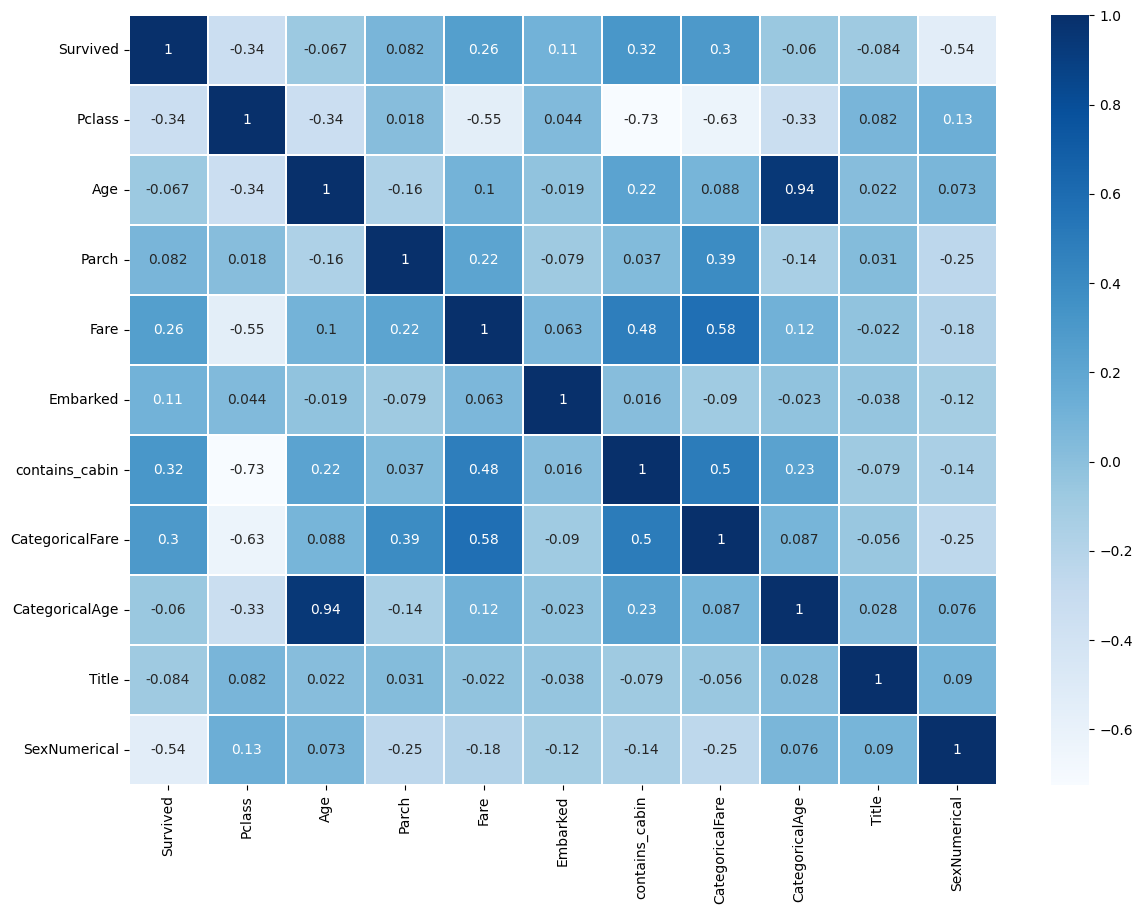

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap=colormap, annot=True, linewidths=0.2)

In [ ]:
df.head

<bound method NDFrame.head of      Survived  Pclass     Sex  Age  Parch     Fare  Embarked  contains_cabin  \
0           0       3    male   22      0   7.2500       0.0               0   
1           1       1  female   38      0  71.2833       1.0               1   
2           1       3  female   26      0   7.9250       0.0               0   
3           1       1  female   35      0  53.1000       0.0               1   
4           0       3    male   35      0   8.0500       0.0               0   
..        ...     ...     ...  ...    ...      ...       ...             ...   
886         0       2    male   27      0  13.0000       0.0               0   
887         1       1  female   19      0  30.0000       0.0               1   
888         0       3  female   22      2  23.4500       0.0               0   
889         1       1    male   26      0  30.0000       1.0               1   
890         0       3    male   32      0   7.7500       2.0               0   

     Cate

## **LINEAR REGRESSION**

Since our target feature "survived" is binary 0,1, I am not using it for regression. I am changing the Survived column to Survival Probability so that I can use it for linear regression

In [ ]:
# Create a new column 'Survival_Probability' and set it to the same values as 'Survived'
df['Survival_Probability'] = df['Survived']

# Map 'Survived' values to 'Survival_Probability' (0 -> 0, 1 -> 1)
df['Survival_Probability'] = df['Survival_Probability'].map({0: 0, 1: 1})

# Convert 'Survival_Probability' to float for regression
df['Survival_Probability'] = df['Survival_Probability'].astype(float)

# Drop the original 'Survived' column if it's no longer needed
df.drop(columns=['Survived'], inplace=True)

# Now you have the 'Survival_Probability' column ready as the target variable for linear regression


In [ ]:
df

,Pclass,Sex,Age,Parch,Fare,Embarked,contains_cabin,CategoricalFare,CategoricalAge,Title,SexNumerical,Survival_Probability
0,3,male,22,0,7.2500,0.0,0,0,1,4,1,0.0
1,1,female,38,0,71.2833,1.0,1,3,2,4,0,1.0
2,3,female,26,0,7.9250,0.0,0,1,1,4,0,1.0
3,1,female,35,0,53.1000,0.0,1,3,2,4,0,1.0
4,3,male,35,0,8.0500,0.0,0,1,2,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27,0,13.0000,0.0,0,1,1,4,1,0.0
887,1,female,19,0,30.0000,0.0,1,2,1,4,0,1.0
888,3,female,34,2,23.4500,0.0,0,2,2,4,0,0.0
889,1,male,26,0,30.0000,1.0,1,2,1,4,1,1.0


import numpy as np
from google.colab import autoviz
df_6497343163597077292 = autoviz.get_registered_df('df_6497343163597077292')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6497343163597077292, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2138658379656894474 = autoviz.get_registered_df('df_2138658379656894474')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2138658379656894474, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5193635237357377325 = autoviz.get_registered_df('df_5193635237357377325')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5193635237357377325, *['Parch'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4666824865618117054 = autoviz.get_registered_df('df_4666824865618117054')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4666824865618117054, *['Fare'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5325010714125925762 = autoviz.get_registered_df('df_5325010714125925762')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5325010714125925762, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8260217826793798831 = autoviz.get_registered_df('df_8260217826793798831')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8260217826793798831, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8266756000704448752 = autoviz.get_registered_df('df_8266756000704448752')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8266756000704448752, *['Parch'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5068068843502018390 = autoviz.get_registered_df('df_5068068843502018390')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5068068843502018390, *['Fare'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7222556907227644239 = autoviz.get_registered_df('df_7222556907227644239')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7222556907227644239, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_555199571905554279 = autoviz.get_registered_df('df_555199571905554279')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_555199571905554279, *[[['Pclass', 'Age'], ['Age', 'Parch'], ['Parch', 'Fare'], ['Fare', 'Embarked']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8985404316831475353 = autoviz.get_registered_df('df_8985404316831475353')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8985404316831475353, *['Pclass', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_8001426973164313583 = autoviz.get_registered_df('df_8001426973164313583')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8001426973164313583, *['Age', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_7286484856054348287 = autoviz.get_registered_df('df_7286484856054348287')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7286484856054348287, *['Parch', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_5985046005460824739 = autoviz.get_registered_df('df_5985046005460824739')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5985046005460824739, *['Fare', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_7881933629475583292 = autoviz.get_registered_df('df_7881933629475583292')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7881933629475583292, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6464527758214018104 = autoviz.get_registered_df('df_6464527758214018104')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6464527758214018104, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5184253599601706199 = autoviz.get_registered_df('df_5184253599601706199')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5184253599601706199, *['Parch'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4139450935838073163 = autoviz.get_registered_df('df_4139450935838073163')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4139450935838073163, *['Fare'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4830459161322281766 = autoviz.get_registered_df('df_4830459161322281766')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4830459161322281766, *['Pclass'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5649731240645151839 = autoviz.get_registered_df('df_5649731240645151839')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5649731240645151839, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1883725022577424388 = autoviz.get_registered_df('df_1883725022577424388')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1883725022577424388, *['Parch'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6611183837108865057 = autoviz.get_registered_df('df_6611183837108865057')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6611183837108865057, *['Fare'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2989685471457132621 = autoviz.get_registered_df('df_2989685471457132621')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_2989685471457132621, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_248814668011713289 = autoviz.get_registered_df('df_248814668011713289')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_248814668011713289, *[[['Pclass', 'Age'], ['Age', 'Parch'], ['Parch', 'Fare'], ['Fare', 'Embarked']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8285580540846793091 = autoviz.get_registered_df('df_8285580540846793091')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8285580540846793091, *['Pclass', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_5416120058935708840 = autoviz.get_registered_df('df_5416120058935708840')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5416120058935708840, *['Age', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_3632160328340293690 = autoviz.get_registered_df('df_3632160328340293690')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3632160328340293690, *['Parch', 'Sex'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_6716107322247332761 = autoviz.get_registered_df('df_6716107322247332761')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6716107322247332761, *['Fare', 'Sex'], **{'inner': 'box'})
chart

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Pclass', 'CategoricalAge', 'CategoricalFare', 'SexNumerical', 'contains_cabin', 'Parch', 'Title']]
y = df["Survival_Probability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics such as mean squared error and R-squared
mse_lr = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_lr)
print("R-squared: ", r2)

Mean squared error:  0.1313002100830764
R-squared:  0.41078570990590313


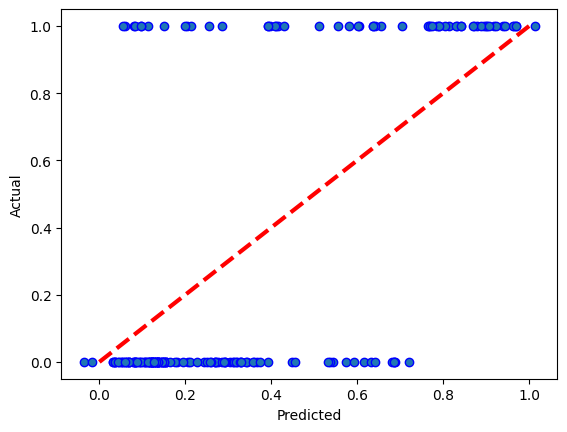

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

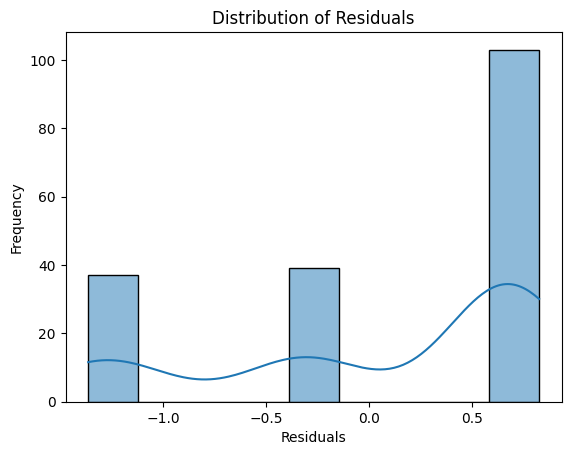

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - y_pred

# Plot the distribution of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

## **K-nearest neighbors regression**

In [ ]:
# importing necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# create a KNN regressor object
knn = KNeighborsRegressor(n_neighbors=4)

# fit the model using training data
knn.fit(X_train, y_train)

# make predictions on test data
y_pred_knn = knn.predict(X_test)

# calculate mean squared error
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(mse_knn)

0.7831703910614525


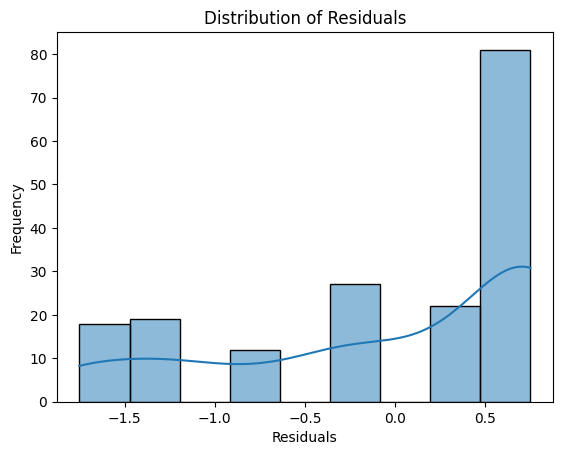

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred_knn

# Plot the distribution of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
# compare the MSE of linear regression and KNN regression
print("Linear Regression MSE:", mse_lr)
print("KNN Regression MSE:", mse_knn)

Linear Regression MSE: 0.6253956890729387
KNN Regression MSE: 0.7831703910614525


## **Logistic Regression**

For Logistic Regression, We are predicting passengers who survived by taking sex as a feature.

In [ ]:
# importing necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# select the independent and dependent variables
X = df[["SexNumerical"]]   # independent variable
y = df["Survived"]   # dependent variable

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model object
logreg = LogisticRegression()

# fit the model using training data
logreg.fit(X_train, y_train)

# make predictions on test data
y_pred = logreg.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy score:", accuracy)


Accuracy score: 0.7821229050279329


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# make predictions on test data with different thresholds
y_pred_proba = logreg.predict_proba(X_test)[:, 1]   # probability of class 1
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    # make binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Threshold:", threshold)
    print("Accuracy score:", accuracy)
    print("Recall score:", recall)
    print("F-1 score:", f1)
    print("")

# find the threshold that maximizes recall and F-1 score
recalls = []
f1_scores = []

for threshold in thresholds:
    # make binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # calculate evaluation metrics
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    recalls.append(recall)
    f1_scores.append(f1)

max_recall_threshold = thresholds[recalls.index(max(recalls))]
max_f1_threshold = thresholds[f1_scores.index(max(f1_scores))]

print("Threshold that maximizes recall:", max_recall_threshold)
print("Threshold that maximizes F-1 score:", max_f1_threshold)

Threshold: 0.1
Accuracy score: 0.4134078212290503
Recall score: 1.0
F-1 score: 0.5849802371541502

Threshold: 0.2
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.3
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.4
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.5
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.6
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.7
Accuracy score: 0.7821229050279329
Recall score: 0.7027027027027027
F-1 score: 0.7272727272727273

Threshold: 0.8
Accuracy score: 0.5865921787709497
Recall score: 0.0
F-1 score: 0.0

Threshold: 0.9
Accuracy score: 0.5865921787709497
Recall score: 0.0
F-1 score: 0.0

Threshold that maximizes recall: 0.1
Threshold th